In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import plotly.express as x
from collections import Counter

<font size="5">**Storytelling Case Study: Airbnb, NYC**
 
<font size="2">Ashna Sikka & Sujatha Sriperumbudur

In [2]:
#reading the dataset 
airbnb=pd.read_csv('AB_NYC_2019.csv')
airbnb.head(3)

id                                 name  host_id  host_name  \
0  2539   Clean & quiet apt home by the park     2787       John   
1  2595                Skylit Midtown Castle     2845   Jennifer   
2  3647  THE VILLAGE OF HARLEM....NEW YORK !     4632  Elisabeth   

  neighbourhood_group neighbourhood  latitude  longitude        room_type  \
0            Brooklyn    Kensington  40.64749  -73.97237     Private room   
1           Manhattan       Midtown  40.75362  -73.98377  Entire home/apt   
2           Manhattan        Harlem  40.80902  -73.94190     Private room   

   price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
0    149               1                  9  19-10-2018               0.21   
1    225               1                 45  21-05-2019               0.38   
2    150               3                  0         NaN                NaN   

   calculated_host_listings_count  availability_365  
0                               6               365  
1                               2               355  
2                               1               365

In [3]:
#understanding the dataset
airbnb.shape

(48895, 16)

In [4]:
#describing the datset
airbnb.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

In [5]:
#understanding types
airbnb.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

<font size="4">**Data Wrangling & Cleaning**

In [6]:
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Missing vales are present in the name,host_name, last_reviews and reviews_per month columns.
In the abbove exploration we can see that the number_of_reviews is 0 then it does not make any sense to have last_review and reviews_per_month are marked as NaN.

#Let's check if our assumption is true. 
0 reviews will have missing values in last_review and reviews_per_month columns.

In [7]:
test = airbnb.loc[ airbnb.reviews_per_month.isnull(),['number_of_reviews', 'reviews_per_month']]
test.head()

number_of_reviews  reviews_per_month
2                   0                NaN
19                  0                NaN
26                  0                NaN
36                  0                NaN
38                  0                NaN

In [8]:
test1 = airbnb.loc[ airbnb.last_review.isnull(),['number_of_reviews', 'last_review']]
test1.head()

number_of_reviews last_review
2                   0         NaN
19                  0         NaN
26                  0         NaN
36                  0         NaN
38                  0         NaN

**test & test1 Results**

We can see our assumptions holds true.

> The exact amount of numm values are present in both the columns. 

> We will substitue 0 for the missing values present in the reviews_per_month.

> We will leaves the last_reviews as it is for now. As it is in the datetime object.

In [9]:
airbnb.reviews_per_month.fillna(0, inplace=True)

In [10]:
airbnb.reviews_per_month.isnull().sum()

0

<font size="4">***Data Analysis and Visualization***

**host_id**

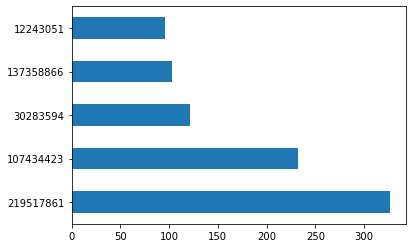

In [11]:
airbnb.host_id.value_counts().iloc[:5].plot(kind = 'barh')

We can observe that the highest times transaction done by a customer is more than 300 in the year 2019.

**room_type**

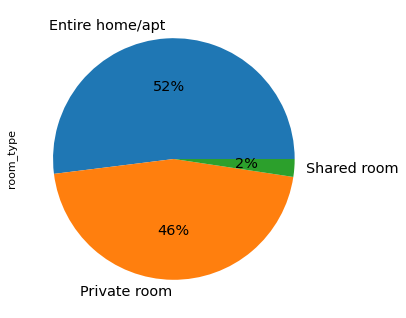

In [12]:
fig = plt.figure(figsize=(5,5), dpi=80)
airbnb['room_type'].value_counts().plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=13)

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64


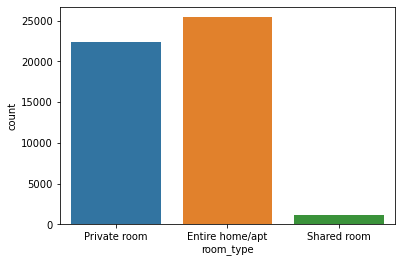

In [13]:
print(airbnb.room_type.value_counts())
sns.countplot(airbnb.room_type)

Interesting to note that in our dataset-

25,000 people i.e., 52% choose to use a house while 22,000 i.e., 46% opted for a private room. Only 1,000 i.e., 2% people choose a shared room.

This could mean more people who use airbnb , use it with family maybe for tours, visits, etc...


**neighbourhood_group**

In [14]:
airbnb.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

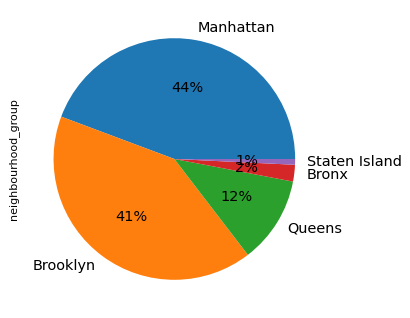

In [15]:
fig = plt.figure(figsize=(5,5), dpi=80)
airbnb['neighbourhood_group'].value_counts().plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=13)

Manhattan is the city where most Airbnb transactions have occurred with 44% of entire dataset. 

The least happend in Staten Island only 1%. Brooklyn consisted on 41% of transactions with 12% Queens and 2 % in Bronx.

**neighbourhood**

In [16]:
len(airbnb.neighbourhood.unique())

221

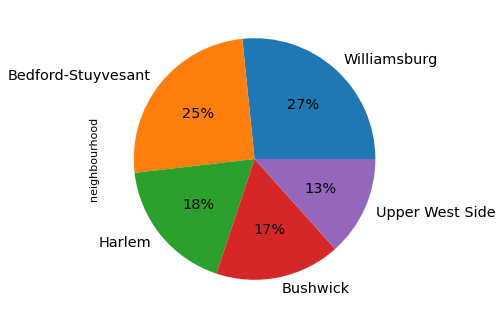

In [17]:
fig = plt.figure(figsize=(5,5), dpi=80)
airbnb['neighbourhood'].value_counts().iloc[:5].plot(kind='pie',  autopct='%1.0f%%', startangle=360, fontsize=13)

We can see that Williamsburg is the hottest area of transaction followed by Bedford-Stuyvesant.

This pie-chart shows the top 5 areas by percentage in the dataset.

In [18]:
#checking the top 5 neighbourhood groups where the properties are listed more.
top_5_neighbourhood_group=airbnb['neighbourhood'].value_counts().iloc[:5]
print(top_5_neighbourhood_group)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Name: neighbourhood, dtype: int64


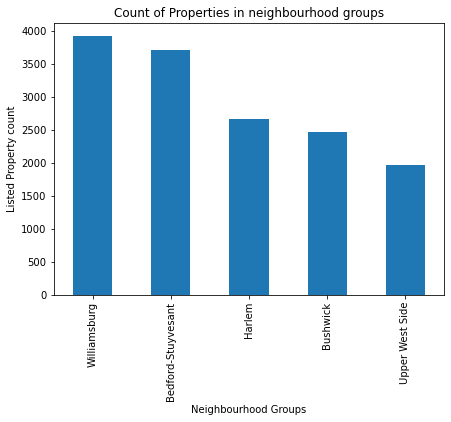

In [19]:
#plotting
plt.figure(figsize=(7,5))
top_5_neighbourhood_group.plot.bar()
plt.xlabel('Neighbourhood Groups')
plt.ylabel('Listed Property count')
plt.title("Count of Properties in neighbourhood groups")
plt.show()

**price**

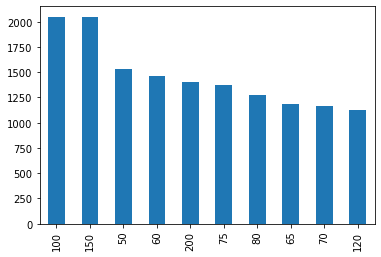

In [20]:
airbnb.price.value_counts().iloc[:10].plot(kind = 'bar')

Almost 2000+ airbnb's has a price of 100 dollars and 150 dollars each respectively.

1500 airbnb's have around 50 dollars price.

In [21]:
airbnb.price.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

The average pricing is around 152 dollars.

50% of data has price greater than 106 dollars.

The costliest airbnb costs 10,000 dollars price.

In [22]:
airbnb[airbnb['price'] == 10000.000000]

id                                             name   host_id  \
9151    7003697              Furnished room in Astoria apartment  20582832   
17692  13894339  Luxury 1 bedroom apt. -stunning Manhattan views   5143901   
29238  22436899                              1-BR Lincoln Center  72390391   

      host_name neighbourhood_group    neighbourhood  latitude  longitude  \
9151   Kathrine              Queens          Astoria  40.76810  -73.91651   
17692      Erin            Brooklyn       Greenpoint  40.73260  -73.95739   
29238    Jelena           Manhattan  Upper West Side  40.77213  -73.98665   

             room_type  price  minimum_nights  number_of_reviews last_review  \
9151      Private room  10000             100                  2  13-02-2016   
17692  Entire home/apt  10000               5                  5  27-07-2017   
29238  Entire home/apt  10000              30                  0         NaN   

       reviews_per_month  calculated_host_listings_count  availability_365  
9151                0.04                               1                 0  
17692               0.16                               1                 0  
29238               0.00                               1                83

We have 3 airbnbs with 10,000 per night luxury stay, 1 being private room and 2 Entire home/apt.

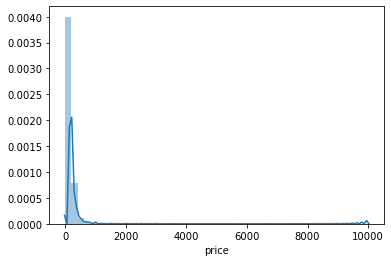

In [23]:
#distribution of the price of the properties.
sns.distplot(airbnb.price,bins=50)

The distribution of the price is heavily skewed. Most properties price ranges between 0 to 2,000 and very few have propeties have greater prices.

Also, some properties show the price as 0 which is not possible.

In [24]:
#checking properties with 0 price.
properties_0_price = airbnb.loc[airbnb.price<=0]
print('shape of airbnb:',properties_0_price.shape)
properties_0_price.head()

shape of airbnb: (11, 16)


id                                               name    host_id  \
23161  18750597  Huge Brooklyn Brownstone Living, Close to it all.    8993084   
25433  20333471      ★Hostel Style Room | Ideal Traveling Buddies★  131697576   
25634  20523843    MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)   15787004   
25753  20608117                    Sunny, Quiet Room in Greenpoint    1641537   
25778  20624541      Modern apartment in the heart of Williamsburg   10132166   

          host_name neighbourhood_group       neighbourhood  latitude  \
23161      Kimberly            Brooklyn  Bedford-Stuyvesant  40.69023   
25433        Anisha               Bronx     East Morrisania  40.83296   
25634  Martial Loft            Brooklyn            Bushwick  40.69467   
25753        Lauren            Brooklyn          Greenpoint  40.72462   
25778       Aymeric            Brooklyn        Williamsburg  40.70838   

       longitude        room_type  price  minimum_nights  number_of_reviews  \
23161  -73.95428     Private room      0               4                  1   
25433  -73.88668     Private room      0               2                 55   
25634  -73.92433     Private room      0               2                 16   
25753  -73.94072     Private room      0               2                 12   
25778  -73.94645  Entire home/apt      0               5                  3   

      last_review  reviews_per_month  calculated_host_listings_count  \
23161  06-01-2018               0.05                               4   
25433  24-06-2019               2.56                               4   
25634  18-05-2019               0.71                               5   
25753  27-10-2017               0.53                               2   
25778  02-01-2018               0.15                               1   

       availability_365  
23161                28  
25433               127  
25634                 0  
25753                 0  
25778                73

11 properties have 0 price which is absurd. Assuming that these were entered by mistake or there is technical error.

> To impute this we will be taking mean, but as we know that prices are heavily skewed; this will affect the mean.

> To impute with Median an median is less affected by outliers or extreme values.

> > We can also look at the relation of price on various other factors in the dataset to find a better way of imputing.

**Minimum Nights**

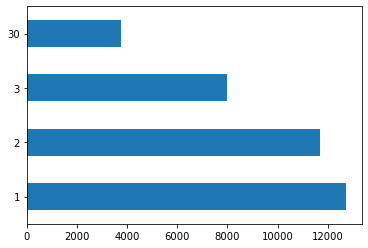

In [25]:
airbnb['minimum_nights'].value_counts().iloc[:4].plot(kind = 'barh')

We can observe that most 12,000 people used 1 night stay in airbnb.

Nearly 11,500 people choose 2 night stay while 8,000 choose 3 night stay.

Almost 4,000 stayed upto a month.

**Number of reviews**

In [26]:
airbnb['number_of_reviews'].value_counts()

0      10052
1       5244
2       3465
3       2520
4       1994
       ...  
404        1
436        1
388        1
341        1
607        1
Name: number_of_reviews, Length: 394, dtype: int64

10,052 airbnbs don't have any reviews.

5,244 has around 1 review and the maximum number of reviews is 607 which only 1 airbnb has.

In [27]:
airbnb[airbnb['number_of_reviews'] == 607]

id                        name  host_id host_name  \
2031  903972  Great Bedroom in Manhattan  4734398        Jj   

     neighbourhood_group neighbourhood  latitude  longitude     room_type  \
2031           Manhattan        Harlem  40.82085  -73.94025  Private room   

      price  minimum_nights  number_of_reviews last_review  reviews_per_month  \
2031     49               1                607  21-06-2019               7.75   

      calculated_host_listings_count  availability_365  
2031                               3               293

Great Bedroom in Manhattan gets the highest reviews and it costs 49 dollars.

In [28]:
highest_reviews = airbnb.sort_values(by='number_of_reviews',ascending=False)
highest_reviews.head()

id                            name   host_id host_name  \
11759   9145202         Room near JFK Queen Bed  47621202      Dona   
2031     903972      Great Bedroom in Manhattan   4734398        Jj   
2030     903947  Beautiful Bedroom in Manhattan   4734398        Jj   
2015     891117    Private Bedroom in Manhattan   4734398        Jj   
13495  10101135         Room Near JFK Twin Beds  47621202      Dona   

      neighbourhood_group neighbourhood  latitude  longitude     room_type  \
11759              Queens       Jamaica  40.66730  -73.76831  Private room   
2031            Manhattan        Harlem  40.82085  -73.94025  Private room   
2030            Manhattan        Harlem  40.82124  -73.93838  Private room   
2015            Manhattan        Harlem  40.82264  -73.94041  Private room   
13495              Queens       Jamaica  40.66939  -73.76975  Private room   

       price  minimum_nights  number_of_reviews last_review  \
11759     47               1                629  05-07-2019   
2031      49               1                607  21-06-2019   
2030      49               1                597  23-06-2019   
2015      49               1                594  15-06-2019   
13495     47               1                576  27-06-2019   

       reviews_per_month  calculated_host_listings_count  availability_365  
11759              14.58                               2               333  
2031                7.75                               3               293  
2030                7.72                               3               342  
2015                7.57                               3               339  
13495              13.40                               2               173

The above table shows that the top 5 properties which have recieved the highest number of reviews. Out of 5,three properties are from the Manhattan neighbourhood in Harlem and the host is Jj.

The top property whcih has recieved ost reviews is from Queens in the neighbourhood of jamacia. The th highest review property is also from jamacia and the host is Dona. 

We also notice that these top 5 properties which recived the highest review range in between price of 47 to 49 - all being private rooms. 

**Availability**

In [29]:
airbnb['availability_365'].value_counts()

0      17533
365     1295
364      491
1        408
89       361
       ...  
195       26
196       24
183       24
181       23
202       20
Name: availability_365, Length: 366, dtype: int64

1,295 airbnbs have 365 days availability and rest doesn't.

In [30]:
airbnb[airbnb['availability_365'] == 365].describe()

id       host_id     latitude    longitude        price  \
count  1.295000e+03  1.295000e+03  1295.000000  1295.000000  1295.000000   
mean   1.940195e+07  8.554698e+07    40.729014   -73.943275   250.769884   
std    1.197265e+07  8.786960e+07     0.057781     0.059799   550.497373   
min    2.539000e+03  2.787000e+03    40.507080   -74.242850    20.000000   
25%    8.725256e+06  8.931349e+06    40.687990   -73.983210    72.000000   
50%    2.065068e+07  4.634351e+07    40.730990   -73.954270   125.000000   
75%    3.027040e+07  1.565055e+08    40.762095   -73.921715   225.000000   
max    3.648315e+07  2.733930e+08    40.893740   -73.721730  9999.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count      1295.00000        1295.000000        1295.000000   
mean         19.60000          10.220849           0.540672   
std          65.05093          22.095983           0.980481   
min           1.00000           0.000000           0.000000   
25%           1.00000           0.000000           0.000000   
50%           3.00000           2.000000           0.120000   
75%          30.00000          10.000000           0.630000   
max        1250.00000         183.000000           8.940000   

       calculated_host_listings_count  availability_365  
count                     1295.000000            1295.0  
mean                        13.158301             365.0  
std                         36.224171               0.0  
min                          1.000000             365.0  
25%                          1.000000             365.0  
50%                          2.000000             365.0  
75%                          7.000000             365.0  
max                        327.000000             365.0

Costliest airbnb with 365 days availablity costs around 1,295 dollars with average of 250 dollars.

**review_per_month**

In [31]:
airbnb[airbnb['reviews_per_month'] > 1].reviews_per_month.value_counts().sum()                 

15908

15908 reviews were above 1.

In [32]:
airbnb[airbnb['reviews_per_month'] > 1]['reviews_per_month'].value_counts().iloc[:5] 

2.00    406
3.00    222
4.00    130
1.15     90
1.05     88
Name: reviews_per_month, dtype: int64

Above 1, around 406 airbnbs have 2 reviews per month, 222 with 3 and 130 with 4.

In [33]:
airbnb['reviews_per_month'].max()

58.5

In [34]:
airbnb.room_type.unique()


array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

In [35]:
airbnb[airbnb['reviews_per_month'] == 58.5]

id                                               name    host_id  \
42075  32678719  Enjoy great views of the City in our Deluxe Room!  244361589   

      host_name neighbourhood_group     neighbourhood  latitude  longitude  \
42075   Row NYC           Manhattan  Theater District  40.75918  -73.98801   

          room_type  price  minimum_nights  number_of_reviews last_review  \
42075  Private room    100               1                156  07-07-2019   

       reviews_per_month  calculated_host_listings_count  availability_365  
42075               58.5                               9               299

We can see that one can Enjoy great views in Manhattan which has the highest reviews per month. They offer Private room and is worth 100 dollars per night.

**host listing**

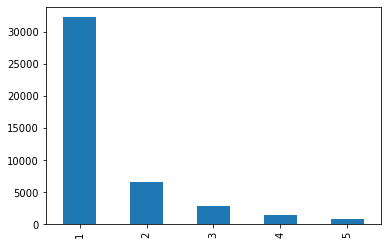

In [36]:
airbnb.calculated_host_listings_count.value_counts().iloc[:5].plot(kind = 'bar')

Most hosts used the listings only once that is 30,000+ and around 6000 had 2 times.

In [37]:
top_host=airbnb.host_id.value_counts().head(10)
top_host

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [38]:
top_host_check=airbnb.calculated_host_listings_count.max()
top_host_check

327

 Maximum times a host has used listings is 327 times.

In [39]:
top_host_df=pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host_ID', 'host_id':'P_Count'}, inplace=True)
top_host_df

Host_ID  P_Count
0  219517861      327
1  107434423      232
2   30283594      121
3  137358866      103
4   12243051       96
5   16098958       96
6   61391963       91
7   22541573       87
8  200380610       65
9    7503643       52

[Text(0, 0, '7503643'),
 Text(0, 0, '12243051'),
 Text(0, 0, '16098958'),
 Text(0, 0, '22541573'),
 Text(0, 0, '30283594'),
 Text(0, 0, '61391963'),
 Text(0, 0, '107434423'),
 Text(0, 0, '137358866'),
 Text(0, 0, '200380610'),
 Text(0, 0, '219517861')]

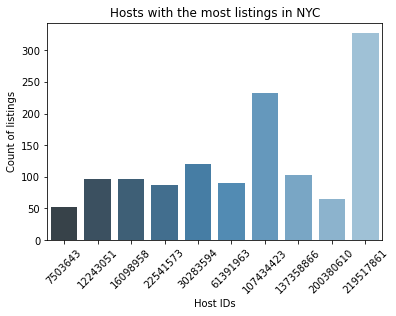

In [40]:
viz_1=sns.barplot(x="Host_ID", y="P_Count", data=top_host_df,
                 palette='Blues_d')
viz_1.set_title('Hosts with the most listings in NYC')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host IDs')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

Inference : there is a good distribution between top 10 hosts with the most listings. First host has more than 300+ listings

In [41]:
#Brooklyn
sub_1=airbnb.loc[airbnb['neighbourhood_group'] == 'Brooklyn']
price_sub1=sub_1[['price']]
#Manhattan
sub_2=airbnb.loc[airbnb['neighbourhood_group'] == 'Manhattan']
price_sub2=sub_2[['price']]
#Queens
sub_3=airbnb.loc[airbnb['neighbourhood_group'] == 'Queens']
price_sub3=sub_3[['price']]
#Staten Island
sub_4=airbnb.loc[airbnb['neighbourhood_group'] == 'Staten Island']
price_sub4=sub_4[['price']]
#Bronx
sub_5=airbnb.loc[airbnb['neighbourhood_group'] == 'Bronx']
price_sub5=sub_5[['price']]
#putting all the prices' dfs in the list
price_list_by_n=[price_sub1, price_sub2, price_sub3, price_sub4, price_sub5]

In [42]:
#creating an empty list that we will append later with price distributions for each neighbourhood_group
p_l_b_n_2=[]
#creating list with known values in neighbourhood_group column
nei_list=['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']
#creating a for loop to get statistics for price ranges and append it to our empty list
for x in price_list_by_n:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    p_l_b_n_2.append(i)
#changing names of the price column to the area name for easier reading of the table    
p_l_b_n_2[0].rename(columns={'price':nei_list[0]}, inplace=True)
p_l_b_n_2[1].rename(columns={'price':nei_list[1]}, inplace=True)
p_l_b_n_2[2].rename(columns={'price':nei_list[2]}, inplace=True)
p_l_b_n_2[3].rename(columns={'price':nei_list[3]}, inplace=True)
p_l_b_n_2[4].rename(columns={'price':nei_list[4]}, inplace=True)
#finilizing our dataframe for final view    
stat_df=p_l_b_n_2
stat_df=[df.set_index('Stats') for df in stat_df]
stat_df=stat_df[0].join(stat_df[1:])
stat_df

Brooklyn  Manhattan   Queens  Staten Island   Bronx
Stats                                                     
min         0.0        0.0     10.0           13.0     0.0
25%        60.0       95.0     50.0           50.0    45.0
50%        90.0      150.0     75.0           75.0    65.0
75%       150.0      220.0    110.0          110.0    99.0
max     10000.0    10000.0  10000.0         5000.0  2500.0

In [43]:
airbnb['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

**Bivariate Analysis**

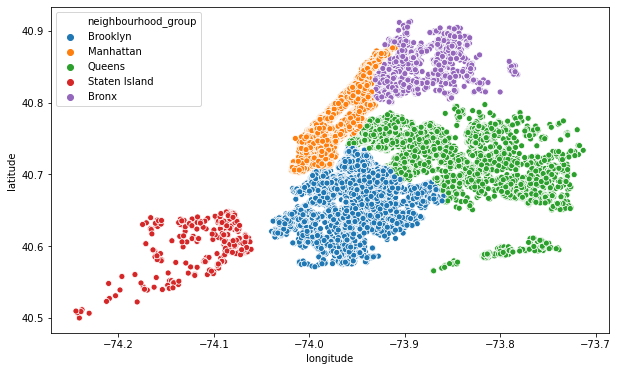

In [44]:

#neighbourhood based on longitude and latititude
plt.figure(figsize=(10,6))
sns.scatterplot(airbnb.longitude,airbnb.latitude,hue=airbnb.neighbourhood_group)

This shows us the map of NewYork city with respect to latitude and longitude. The properties listed in the various neighbourhoods of NYC.

Text(0.5, 1.0, 'Density and distribution of prices for each neighberhood_group')

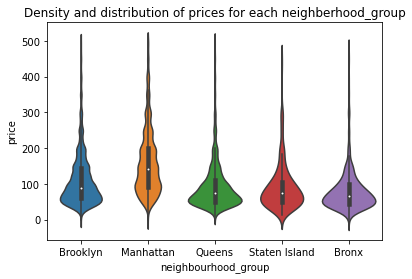

In [45]:
#we can see from our statistical table that we have some extreme values, therefore we need to remove them for the sake of a better visualization

#creating a sub-dataframe with no extreme values / less than 500
sub_6=airbnb[airbnb.price < 500]
#using violinplot to showcase density and distribtuion of prices 
viz_2=sns.violinplot(data=sub_6, x='neighbourhood_group', y='price')
viz_2.set_title('Density and distribution of prices for each neighberhood_group')

Inference : Great, with a statistical table and a violin plot we can definitely observe a couple of things about distribution of prices for Airbnb in NYC boroughs. 

First, we can state that Manhattan has the highest range of prices for the listings with \$150\ price as average observation, followed by Brooklyn with \$90 per night. 

Queens and Staten Island appear to have very similar distributions, Bronx is the cheapest of them all. This distribution and density of prices were completely expected; for example, as it is no secret that Manhattan is one of the most expensive places in the world to live in, where Bronx on other hand appears to have lower standards of living.

In [46]:
#finding out top 10 neighbourhoods
airbnb.neighbourhood.value_counts().head(10)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

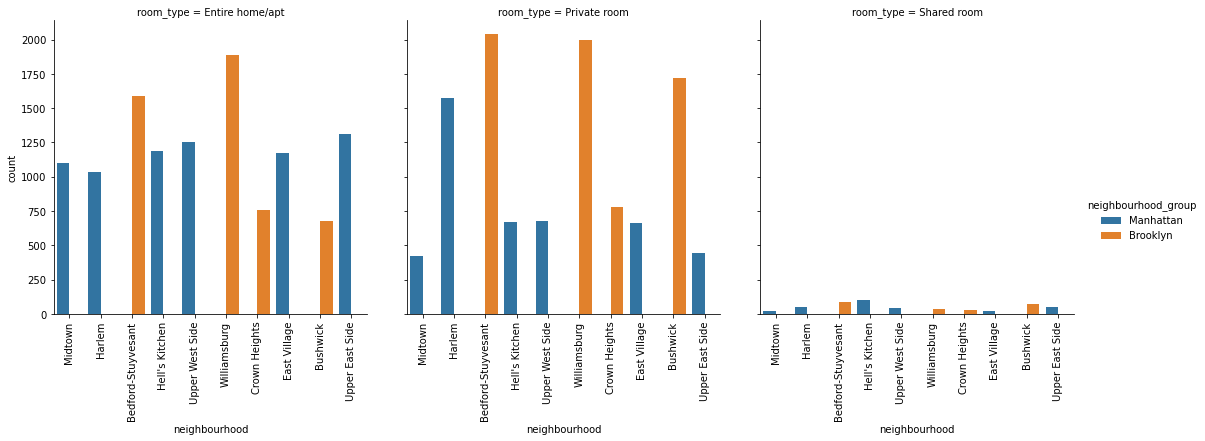

In [47]:
#grabbing top 10 neighbourhoods for sub-dataframe
sub_7=airbnb.loc[airbnb['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
                 'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]
#using catplot to represent multiple interesting attributes together and a count
viz_3=sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=sub_7, kind='count')
viz_3.set_xticklabels(rotation=90)

Amazing, but let' breakdown on what we can see from this plot. 

First, we can see that our plot consists of 3 subplots - that is the power of using catplot; with such output, we can easily proceed with comparing distributions among interesting attributes. Y and X axes stay exactly the same for each subplot, Y-axis represents a count of observations and X-axis observations we want to count. 

However, there are 2 more important elements: column and hue; those 2 differentiate subplots. After we specify the column and determined hue we are able to observe and compare our Y and X axes among specified column as well as color-coded. 

The observation that is definitely contrasted the most is that 'Shared room' type Airbnb listing is barely available among 10 most listing-populated neighborhoods. 

Then, we can see that for these 10 neighborhoods only 2 boroughs are represented: Manhattan and Brooklyn; that was somewhat expected as Manhattan and Brooklyn are one of the most traveled destinations, therefore would have the most listing availability. 

We can also observe that Bedford-Stuyvesant and Williamsburg are the most popular for Manhattan borough, and Harlem for Brooklyn.

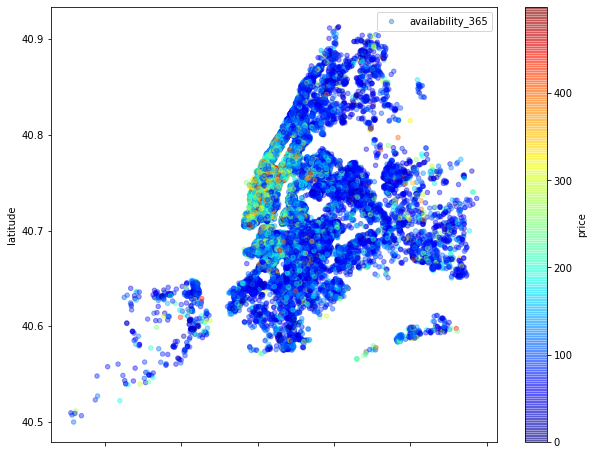

In [48]:
#let's see how scatterplot will come out 
viz_4=sub_6.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price',
                  cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
viz_4.legend()

Good, scatterplot worked just fine to output our latitude and longitude points. However, it would be nice to have a map bellow for fully immersive heatmap in ourcase - let's see what we can do!

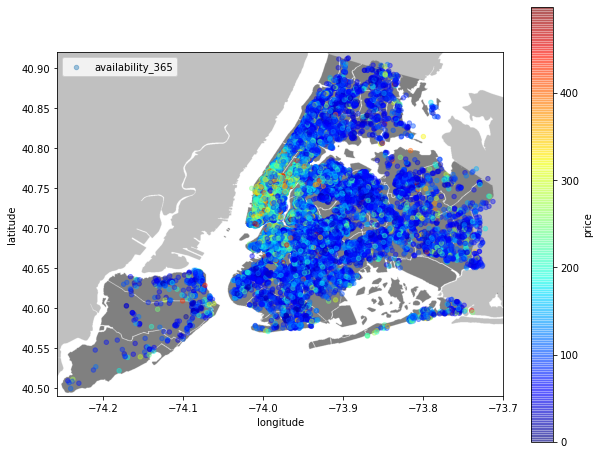

In [49]:
import urllib
#initializing the figure size
plt.figure(figsize=(10,8))
#loading the png NYC image found on Google and saving to my local folder along with the project
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
#using scatterplot again
sub_6.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)

plt.legend()
plt.show()

Inference : Fantastic! After scaling our image the best we can, we observe that we end up with a very immersive heatmap. Using latitude and longitude points were able to visualize all NYC listings. Also, we added a color-coded range for each point on the map based on the price of the listing. 

However, it is important to note that we had to drop some extremely high values as they are treated as outliers for our analysis.

In [50]:
#initializing empty list where we are going to put our name strings
_names_=[]
#getting name strings from the column and appending it to the list
for name in airbnb.name:
    _names_.append(name)
#setting a function that will split those name strings into separate words   
def split_name(name):
    spl=str(name).split()
    return spl
#initializing empty list where we are going to have words counted
_names_for_count_=[]
#getting name string from our list and using split function, later appending to list above
for x in _names_:
    for word in split_name(x):
        word=word.lower()
        _names_for_count_.append(word)

In [51]:
#let's see top 25 used words by host to name their listing
_top_25_w=Counter(_names_for_count_).most_common()
_top_25_w=_top_25_w[0:25]

In [52]:
#now let's put our findings in dataframe for further visualizations
sub_w=pd.DataFrame(_top_25_w)
sub_w.rename(columns={0:'Words', 1:'Count'}, inplace=True)

[Text(0, 0, 'in'),
 Text(0, 0, 'room'),
 Text(0, 0, 'bedroom'),
 Text(0, 0, 'private'),
 Text(0, 0, 'apartment'),
 Text(0, 0, 'cozy'),
 Text(0, 0, 'the'),
 Text(0, 0, 'to'),
 Text(0, 0, 'studio'),
 Text(0, 0, 'brooklyn'),
 Text(0, 0, 'apt'),
 Text(0, 0, 'spacious'),
 Text(0, 0, '1'),
 Text(0, 0, 'with'),
 Text(0, 0, '2'),
 Text(0, 0, 'of'),
 Text(0, 0, 'east'),
 Text(0, 0, 'and'),
 Text(0, 0, 'manhattan'),
 Text(0, 0, '&'),
 Text(0, 0, 'park'),
 Text(0, 0, 'sunny'),
 Text(0, 0, 'beautiful'),
 Text(0, 0, 'near'),
 Text(0, 0, 'williamsburg')]

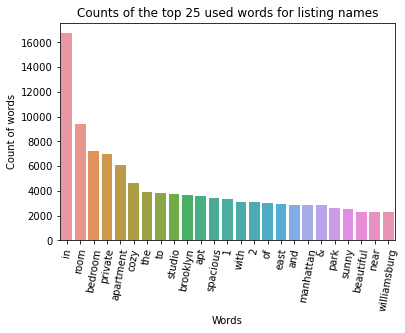

In [53]:
#we are going to use barplot for this visualization
viz_5=sns.barplot(x='Words', y='Count', data=sub_w)
viz_5.set_title('Counts of the top 25 used words for listing names')
viz_5.set_ylabel('Count of words')
viz_5.set_xlabel('Words')
viz_5.set_xticklabels(viz_5.get_xticklabels(), rotation=80)

Inference : We can observe that finding out and going over top 25 used listings' name words - we are able to see one clear trend. 

It shows that hosts are simply describing their listing in a short form with very specific terms for easier search by a potential traveler. 

Words - 'room', 'bedroom', 'private', 'apartment', 'studio'. This shows that there are no catchphrases or 'popular/trending' terms that are used for names; hosts use very simple terms describing the space and the area where the listing is. 

This technique was somewhat expected as dealing with multilingual customers can be tricky and you definitely want to describe your space in a concise and understood form as much as possible

In [54]:
#last column we need to look at is 'number_of_reviews'

#let's grab 10 most reviewed listings in NYC
top_reviewed_listings=airbnb.nlargest(10,'number_of_reviews')
top_reviewed_listings

id                                               name   host_id  \
11759   9145202                            Room near JFK Queen Bed  47621202   
2031     903972                         Great Bedroom in Manhattan   4734398   
2030     903947                     Beautiful Bedroom in Manhattan   4734398   
2015     891117                       Private Bedroom in Manhattan   4734398   
13495  10101135                            Room Near JFK Twin Beds  47621202   
10623   8168619                  Steps away from Laguardia airport  37312959   
1879     834190           Manhattan Lux Loft.Like.Love.Lots.Look !   2369681   
20403  16276632  Cozy Room Family Home LGA Airport NO CLEANING FEE  26432133   
4870    3474320                 Private brownstone studio Brooklyn  12949460   
471      166172                    LG Private Room/Family Friendly    792159   

      host_name neighbourhood_group    neighbourhood  latitude  longitude  \
11759      Dona              Queens          Jamaica  40.66730  -73.76831   
2031         Jj           Manhattan           Harlem  40.82085  -73.94025   
2030         Jj           Manhattan           Harlem  40.82124  -73.93838   
2015         Jj           Manhattan           Harlem  40.82264  -73.94041   
13495      Dona              Queens          Jamaica  40.66939  -73.76975   
10623      Maya              Queens    East Elmhurst  40.77006  -73.87683   
1879      Carol           Manhattan  Lower East Side  40.71921  -73.99116   
20403  Danielle              Queens    East Elmhurst  40.76335  -73.87007   
4870        Asa            Brooklyn       Park Slope  40.67926  -73.97711   
471       Wanda            Brooklyn         Bushwick  40.70283  -73.92131   

             room_type  price  minimum_nights  number_of_reviews last_review  \
11759     Private room     47               1                629  05-07-2019   
2031      Private room     49               1                607  21-06-2019   
2030      Private room     49               1                597  23-06-2019   
2015      Private room     49               1                594  15-06-2019   
13495     Private room     47               1                576  27-06-2019   
10623     Private room     46               1                543  01-07-2019   
1879      Private room     99               2                540  06-07-2019   
20403     Private room     48               1                510  06-07-2019   
4870   Entire home/apt    160               1                488  01-07-2019   
471       Private room     60               3                480  07-07-2019   

       reviews_per_month  calculated_host_listings_count  availability_365  
11759              14.58                               2               333  
2031                7.75                               3               293  
2030                7.72                               3               342  
2015                7.57                               3               339  
13495              13.40                               2               173  
10623              11.59                               5               163  
1879                6.95                               1               179  
20403              16.22                               5               341  
4870                8.14                               1               269  
471                 6.70                               1                 0

In [55]:
price_avrg=top_reviewed_listings.price.mean()
print('Average price per night: {}'.format(price_avrg))

Average price per night: 65.4


Inference : There is no reason to visualize this as table format would be the most suitable output for better reading. 

From this table output, we can observe that top 10 most reviewed listings on Airbnb for NYC has price average of \$65.4 with most of the listings under \$50, and 9/10 of them are 'Private room' type; top reviewed listing has 629 reviews.

# Conclusion

This Airbnb ('AB_NYC_2019') dataset for the 2019 year appeared to be a very rich dataset with a variety of columns that allowed us to do deep data exploration on each significant column presented.


Insights

The price is heavily skewed. It has some irregularities such as minimunm price was "0" which is not possible. As they wouldnt give it for free.

We found missing values in last_review and reviews_per_month which has a sililar pattern.

From Univariate Analysis we found out the top 5 neighbourhood groups and neighbourhoods with hightest property listings.

We have found hosts that take good advantage of the Airbnb platform and provide the most listings; we found that our top host has 327 listings. 

We know the top 5 properties which had the highest reviews.

We saw the host who had the highest number of proprty listings on Airbnb.

We also saw the disctribution of properties based on the neighbourhood gropus using a scatter plot.

We proceeded with analyzing neighboroughs and neighborhood listing densities and what areas were more popular than another. 

Next, we put good use of our latitude and longitude columns and used to create a geographical heatmap color-coded by the price of listings.

Further, we came back to the first column with name strings and had to do a bit more coding to parse each title and analyze existing trends on how listings are named as well as what was the count for the most used words by hosts. 

Lastly, we found the most reviewed listings and analyzed some additional attributes. For our data exploration purposes, it also would be nice to have couple additional features, such as positive and negative numeric (0-5 stars) reviews or 0-5 star average review for each listing; addition of these features would help to determine the best-reviewed hosts for NYC along with 'number_of_review' column that is provided. 
